In [1]:
import numpy as np 

import matplotlib.pyplot as plt

from scipy.integrate import quad
import scipy.integrate as integrate

In [2]:
eq1 = {
    'eps': 0.1,
    'a': 0,
    'b' : 1,
    'lambda': 1/2,
    'f' : lambda x: (5/6)*x,
    'y_true' : lambda x: x,
    'K' : lambda x, s: (x*s)
    }

eq2 = {
    'eps': 0.05,
    'a': 0,
    'b' : 1,
    'lambda': -1,
    'f' : lambda t: np.exp(t) - t,
    'y_true' :  lambda t: 1,
    'K' : lambda x, s: (x*s)
    }

eq3 = {
    'eps': 0.05,
    'a': -1,
    'b' : 1,
    'lambda': -1,
    'f' : lambda t: 1,
    'y_true' :  lambda x: 1 + 6*x**2,
    'K' : lambda x, s: (x**2 + x*s)
    }

def XY(eq):
    x=np.arange (eq['a'], eq['b'], eq['eps'])
    x=x.reshape(len(x),1)
    n=len(x)
    y=[] 
    for i in range(n):
        y.append([])
        y[i].append(eq['y_true'](x[i]))
    y=np.array(y).reshape(n,1) 
    return x, y

def printer(x, y_true, y_pred):
    plt.plot(x, y_true, '-g',linewidth=2, label='y_true')
    plt.plot(x, y_pred, 'or', label='y_pred')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Task1

C:\Users\searg\AppData\Local\Temp\ipykernel_17284\3548517005.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][0]=-eps*wt*lam*K(x[i],x[0])
C:\Users\searg\AppData\Local\Temp\ipykernel_17284\3548517005.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][j]= -eps*wj*lam*K(x[i],x[j])
C:\Users\searg\AppData\Local\Temp\ipykernel_17284\3548517005.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][n-1]= -eps*wt*lam*K(x[i],x[n-1])
C:\Users\searg\AppData

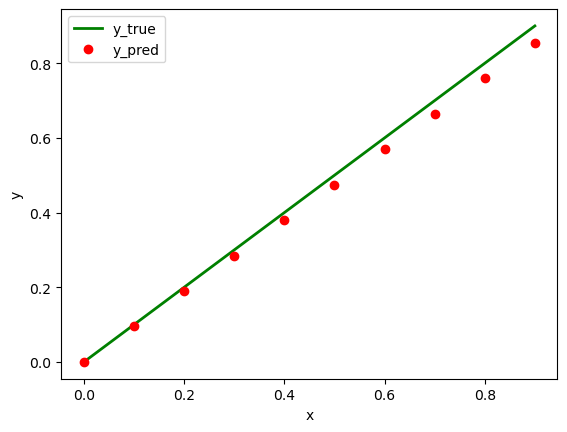

In [3]:
def Solver1(eq):
    eps = eq['eps']
    a = eq['a']
    b = eq['b']
    lam = eq['lambda']
    f = eq['f']
    K = eq['K']
    x, y_true = XY(eq)
    n = len(x)
    wt=1/2
    wj=1
    A=np.zeros((n, n))
    for i in range(n):
        A[i][0]=-eps*wt*lam*K(x[i],x[0])
        for j in range(1,n-1,1):
            A[i][j]= -eps*wj*lam*K(x[i],x[j])
        A[i][n-1]= -eps*wt*lam*K(x[i],x[n-1])
        A[i][i]= A[i][i]+ 1
    B = np.zeros((n,1))
    for j in range(n):
        B[j][0] = f(x[j])
    y=np.linalg.solve(A, B)
    return y, x, y_true

y_pred, x, y_true = Solver1(eq1)
printer(x, y_true, y_pred)

# Task2

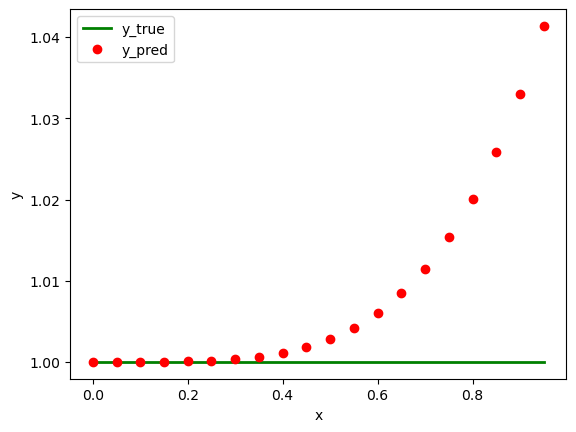

In [4]:
def Solver2(eq):
    def bfun(t,m,f):
        return beta(t)[m]*f(t)
    def Aijfun(t,m,k):
        return beta(t)[m]*alpha(t)[k]
    
    alpha = lambda t: [t**2, t**3, t**4, t**5] 
    beta = lambda t: [t, 1/2*t**2, 1/6*t**3, 1/24*t**4]

    f = eq['f']
    Lambda = eq['lambda']
    a = eq['a']
    b = eq['b']
    x, y_true = XY(eq)

    m=len(alpha(0)) # определяем размер alpha
    M=np.zeros((m,m))
    r=np.zeros((m,1))

    for i in range(m):
        r[i]=integrate.quad(bfun, a, b,args=(i,f))[0]
        for j in range(m):
            M[i][j]=-Lambda*integrate.quad(Aijfun, a, b,args=(i,j))[0]

    for i in range(m):
        M[i][i] =M[i][i]+1

    c=np.linalg.solve(M, r)
    y_approx = Lambda*(c[0]*alpha(x)[0]+c[1]*alpha(x)[1])+f(x)
    return y_approx, x, y_true

y_pred, x, y_true = Solver2(eq2)
printer(x, y_true, y_pred)

# Task3

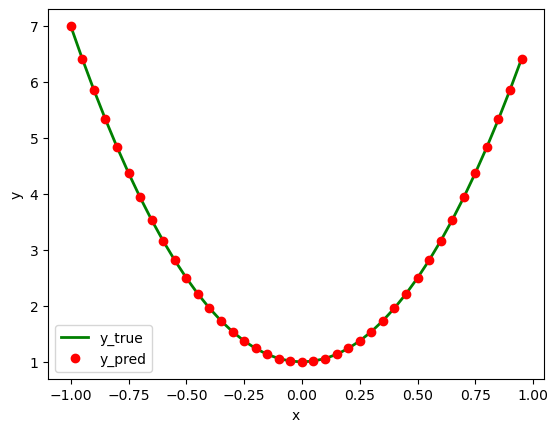

In [5]:
def Solver3(eq, phi, psi):
    lam = eq['lambda']
    f = eq['f']
    K = eq['K']
    a = eq['a']
    b = eq['b']
    x, y_true = XY(eq)

    alpha = np.zeros([2, 2])
    beta = np.zeros(2)
    for i in range(beta.shape[0]):
        beta[i] = -lam * quad(lambda x: psi[i](x) * quad(lambda s: K(x, s) * f(s), a, b)[0], a, b)[0]
        for j in range(alpha.shape[1]):
            alpha[i][j] = quad(lambda x: phi[i](x) * psi[j](x), a, b)[0] + lam * \
                      quad(lambda x: psi[i](x) * quad(lambda s: K(x, s) * phi[j](s), a, b)[0], a, b)[0]
    c = np.linalg.solve(alpha, beta)
    y_pred = 1 + c[0] * phi[0](x) + c[1] * phi[1](x)
    return y_pred, x, y_true

phi = [lambda x: x,
        lambda x: x**2]
    
psi = [lambda x: 1,
        lambda x: x]

y_pred, x, y_true = Solver3(eq3, phi, psi)

printer(x, y_true, y_pred)